In [202]:
import xarray as xr
from xhistogram.xarray import histogram
import pandas as pd
import numpy as np
from xmovie import Movie
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [203]:
path = 'data/raw/ariane_t4217_sec7_inc-volume.nc'
ds = xr.open_dataset(path)
region_limits = np.loadtxt('data/region_limits')

In [204]:
# Bins
times = pd.date_range('1958-01-01','2015-12-31',freq='5D')
# xs = np.arange(region_limits[0,0],region_limits[0,1])
# # ys = np.arange(region_limits[1,0],region_limits[1,1])
# lons = np.arange(ds['final_lon'].min(),ds['final_lon'].max(),0.1)
# lats = np.arange(ds['final_lat'].min(),ds['final_lat'].max(),0.1)
d = 0.25
lons = np.arange(-70,-20,d)
lats = np.arange(40,70,d)

In [205]:
ds_hist = histogram(ds['final_lat'],ds['final_lon'],ds['final_time'].astype('float64'),bins=[lats,lons,times.values.astype('float64')],dim=['ntraj'],weights=ds['init_volume'])
# Convert time bins back to datetime
ds_hist['final_time_bin'] = ds_hist['final_time_bin'].astype('datetime64[ns]')

In [207]:
def mapplot(ds,fig,tt,**kwargs):
    ax = fig.subplots(subplot_kw={'projection':kwargs['crs']})
    Z = ds.isel(time=tt)
    im = ax.pcolormesh(Z['final_lon_bin'],Z['final_lat_bin'],Z,vmin=kwargs['vmin'],vmax=kwargs['vmax'],cmap='pink_r', transform=kwargs['crs_transform'])
    cb = plt.colorbar(im,ax=ax,fraction=0.02)
    ax.coastlines(color='darkgray')
    ax.gridlines(linestyle=':')
    ax.set_title('Time : '+str(ds['time'].isel(time=tt).values))

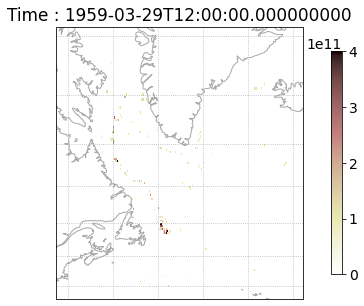

In [208]:
ds_mov = ds_hist.rename({'final_time_bin':'time'})
fig = plt.figure(figsize=[10,5])
mapplot(ds_mov,fig,90,crs=ccrs.Mercator(),crs_transform=ccrs.PlateCarree(),vmin=0,vmax=4E11)

In [209]:
years = np.arange(1958,2016)
for year in years[:-1]:
    print(year)
    ds_mov = ds_hist.rename({'final_time_bin':'time'}).sel(time=slice(str(year)+'-10-01',str(year+1)+'-06-01'))
    mov_custom = Movie(ds_mov, mapplot, crs=ccrs.Mercator(),crs_transform=ccrs.PlateCarree(),vmin=0,vmax=5E11)
    mov_custom.save('figures/subduction/subduction_'+str(year)+'.mp4',overwrite_existing=True,framerate=2)

1958


/home/users/graemem/miniconda/envs/ariane/lib/python3.8/site-packages/xmovie/core.py:320: UserWarning: The provided `plotfunc` does not provide the expected number of output arguments.            Expected a function `ax,pp =plotfunc(...)` but got %i output arguments. Inserting dummy values. This should not affect output. 
  warnings.warn(


Movie created at subduction_1958.mp4
1959
Movie created at subduction_1959.mp4
1960
Movie created at subduction_1960.mp4
1961
Movie created at subduction_1961.mp4
1962
Movie created at subduction_1962.mp4
1963
Movie created at subduction_1963.mp4
1964
Movie created at subduction_1964.mp4
1965
Movie created at subduction_1965.mp4
1966
Movie created at subduction_1966.mp4
1967
Movie created at subduction_1967.mp4
1968
Movie created at subduction_1968.mp4
1969
Movie created at subduction_1969.mp4
1970
Movie created at subduction_1970.mp4
1971
Movie created at subduction_1971.mp4
1972
Movie created at subduction_1972.mp4
1973
Movie created at subduction_1973.mp4
1974
Movie created at subduction_1974.mp4
1975
Movie created at subduction_1975.mp4
1976
Movie created at subduction_1976.mp4
1977
Movie created at subduction_1977.mp4
1978
Movie created at subduction_1978.mp4
1979
Movie created at subduction_1979.mp4
1980
Movie created at subduction_1980.mp4
1981
Movie created at subduction_1981.m

In [210]:
ds_mov = ds_hist.rename({'final_time_bin':'time'})
mov_custom = Movie(ds_mov, mapplot, crs=ccrs.Mercator(),crs_transform=ccrs.PlateCarree(),vmin=0,vmax=5E11)
mov_custom.save('figures/subduction/subduction_'+str(year)+'.mp4',overwrite_existing=True,framerate=15)

Movie created at subduction_2014.mp4


array([-70. , -69.8, -69.6, -69.4, -69.2, -69. , -68.8, -68.6, -68.4,
       -68.2, -68. , -67.8, -67.6, -67.4, -67.2, -67. , -66.8, -66.6,
       -66.4, -66.2, -66. , -65.8, -65.6, -65.4, -65.2, -65. , -64.8,
       -64.6, -64.4, -64.2, -64. , -63.8, -63.6, -63.4, -63.2, -63. ,
       -62.8, -62.6, -62.4, -62.2, -62. , -61.8, -61.6, -61.4, -61.2,
       -61. , -60.8, -60.6, -60.4, -60.2, -60. , -59.8, -59.6, -59.4,
       -59.2, -59. , -58.8, -58.6, -58.4, -58.2, -58. , -57.8, -57.6,
       -57.4, -57.2, -57. , -56.8, -56.6, -56.4, -56.2, -56. , -55.8,
       -55.6, -55.4, -55.2, -55. , -54.8, -54.6, -54.4, -54.2, -54. ,
       -53.8, -53.6, -53.4, -53.2, -53. , -52.8, -52.6, -52.4, -52.2,
       -52. , -51.8, -51.6, -51.4, -51.2, -51. , -50.8, -50.6, -50.4,
       -50.2, -50. , -49.8, -49.6, -49.4, -49.2, -49. , -48.8, -48.6,
       -48.4, -48.2, -48. , -47.8, -47.6, -47.4, -47.2, -47. , -46.8,
       -46.6, -46.4, -46.2, -46. , -45.8, -45.6, -45.4, -45.2, -45. ,
       -44.8, -44.6,

In [12]:
ds['final_time'].max()

<xarray.DataArray 'final_time' ()>
array('2015-09-25T02:09:33.132139737', dtype='datetime64[ns]')

In [13]:
pd.date_range('1958-01-01','2015-12-31',freq='5D')

DatetimeIndex(['1958-01-01', '1958-01-06', '1958-01-11', '1958-01-16',
               '1958-01-21', '1958-01-26', '1958-01-31', '1958-02-05',
               '1958-02-10', '1958-02-15',
               ...
               '2015-11-13', '2015-11-18', '2015-11-23', '2015-11-28',
               '2015-12-03', '2015-12-08', '2015-12-13', '2015-12-18',
               '2015-12-23', '2015-12-28'],
              dtype='datetime64[ns]', length=4237, freq='5D')